<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Unsupervised Learning: Clustering and K-Means
              
</p>
</div>

DS-NTL-051324<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from src.demo_images import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
sns.set_context('notebook')

## Learning Goals
- Assess what scenarios could use $k$-means
- Articulate the methodology used by $k$-means
- Apply KMeans from sklearn.cluster to a relevant dataset
- Select the appropriate number of clusters using the elbow method and Silhouette Scores
- Evaluate the weaknesses and remedies to $k$-means

#### Unsupervised Learning

Often don't have labels on data:

- Discover the structure in the data.
- Is there some kind of grouping in the data?
- Maybe discover relationship between subsets of the data 
- Its true dimensionality, etc.

Goals are much less clear here:
- We are not creating a prediction machine.
- Instead we are recognizing patterns and uncovering relationships.

## A Classic Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

#### Examples with clustering

There are no training labels here. Just data points:
    
- Our eyes can make out regions.
- But we want a computer to do this automatically.

In [2]:
import pandas as pd
X = pd.read_csv('Data/s1cluster.txt', delimiter = '\s+ ', header = None, names = ['X1', 'X2'], engine = 'python')
X.head()

,X1,X2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


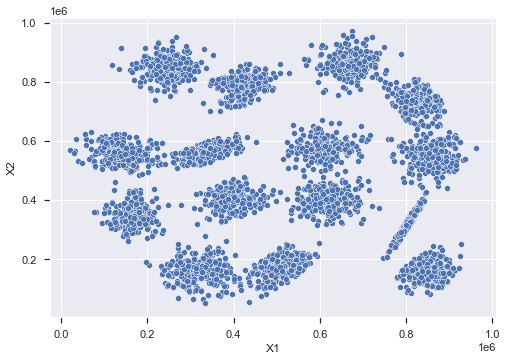

In [3]:
sns.scatterplot(x = 'X1', y = 'X2', data = X);

One example of some value:
- recognizing/labeling and segmenting different types of cell tissue.

<img src = "Images/clustercells.png" width = 600 />

- Discretize image.
- Clustering grid-cell in color-value space of RGB image
- Discover regions of epithelial vs. non-epithelial cells.

Another example might be segmenting customers into groups:

<center><img src = "Images/cust_seg.jpg" width = 500/></center>

Discovering different types of customers within purchase data:

- Could potentially segment into 4 groups?
- Obviously targeted ads/deals, etc.

#### So what do you do with clustering results?

Once clusters are identified:
- Can use discovered clusters as a feature in a predictive task.
- e.g., predict churn rate using customer cluster assignment.


- *How were target labels in classification made in the first place?*

- Discovered clusters becomes _**target labels**_:
- Original data features and cluster assignment as training data for classifier

#### Our first clustering algorithm: KMeans
- Assumes $K$ clusters
- Assumes cluster centers (or centroids).
- Assign each data points to each of the $K$ clusters
    - pick cluster whose centroid is closest to data point.

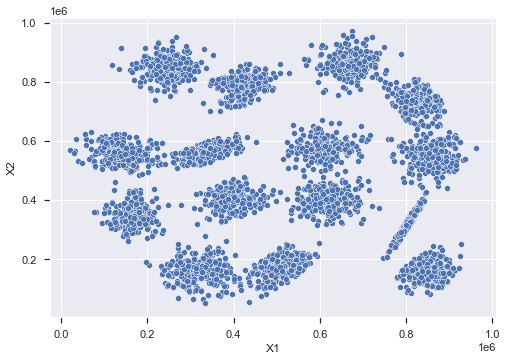

In [4]:
sns.scatterplot(x = 'X1', y = 'X2', data = X)
plt.show()

An iterative process:

- Dont know cluster centroids.
- Data points: don't know cluster assignments.

#### Can help use one to find the other

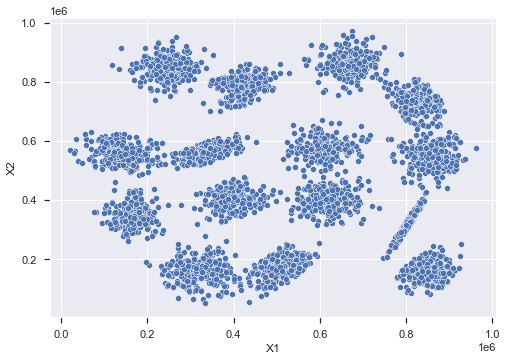

In [5]:
sns.scatterplot(x = 'X1', y = 'X2', data = X)
plt.show()

- Pick a random set of cluster center positions.
- Assign clusters to data points
- Data points and their cluster assignments:
    - get mean of data in each cluster
    - update centroid

<img src = "Images/kmeans.gif" />

It can be shown the procedure lowers the cost function:

$$L = \sum_{i=1}^N \sum_{k = 1}^K \mathbb{1}(c_i = k)|x_i - \mu_k|^2 $$

where $ \mathbb{1}(c_i = k) = 1$ if $x_i$ assigned to cluster $k$ else 0.

- Cost function known as **inertia**

<center>Kill iterations once convergence reached.</center>

<img src = "Images/kmeans_withobjective.gif" />

KMeans is a distanced based algorithm. 
- We need to scale first then do the clustering

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

Create a pipeline

In [7]:
steps = [('scaler', StandardScaler()), 
         ('kmc', KMeans(n_clusters = 15, n_init = 10, random_state =42) ) ]
kmc_pipe = Pipeline(steps)

In [8]:
X

,X1,X2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [9]:
kmc_pipe.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmc', KMeans(n_clusters=15, random_state=42))])

**KMeans attributes**

- .cluster_centers_ attribute: fitted centroid locations
- .labels_ attribute: cluster assignments for each data point.

The centers are scaled:
- Need to unscale back to original data scale.

In [10]:
scld_centers = kmc_pipe['kmc'].cluster_centers_
kc_centers = kmc_pipe['scaler'].inverse_transform(scld_centers)

# class labels for each observation
class_assignment = kmc_pipe['kmc'].labels_

In [11]:
X['label'] = class_assignment
X.head()

,X1,X2,label
0,664159,550946,8
1,665845,557965,8
2,597173,575538,8
3,618600,551446,8
4,635690,608046,8


Visualize cluster assigment/visualization

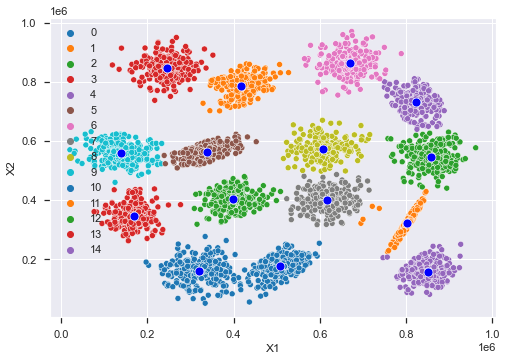

In [12]:
sns.set_palette("tab10")

sns.scatterplot(x = 'X1', y = 'X2', hue = 'label', palette=sns.color_palette('tab10', n_colors= 15), data = X)
sns.scatterplot(x = kc_centers[:,0], y = kc_centers[:,1], color = 'blue', s = 80)

plt.show()

In [13]:
%%capture clusterplot 
sns.set_palette("tab10")

sns.scatterplot(x = 'X1', y = 'X2', hue = 'label', palette=sns.color_palette('tab10', n_colors= 15), data = X)
sns.scatterplot(x = kc_centers[:,0], y = kc_centers[:,1], color = 'blue', s = 80)

plt.show()

Class assignment for a given test point:
- .predict() method for KMeans

In [14]:
kmc_pipe.predict([[0.5e6 , 0.8e6]])

c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

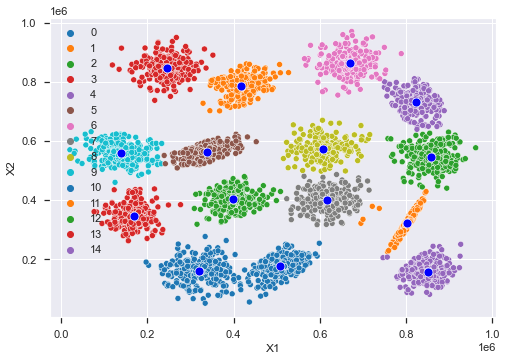

In [15]:
clusterplot()

#### Elbow method: choosing the appropriate number of $k$

KMeans inertia: can also get final value of loss function at convergence.
- This is important: can help us use as a diagnostic tool. 
- Help us pick $k$.

$$L = \sum_{i=1}^N \sum_{k = 1}^K \mathbb{1}(c_i = k)|x_i - \mu_k|^2 $$

In [16]:
kmc_pipe['kmc'].inertia_

154.6080632931866

Issue:
- Adding more and more centroids (increasing K)
- Arbitrarily decreases the convergence value of the inertia.
- More centroids: much lower squared distance of a point to *some* centroid.

$$L = \sum_{i=1}^N \sum_{k = 1}^K \mathbb{1}(c_i = k)|x_i - \mu_k|^2 $$

Define inertia vs K plotting function:

In [17]:
def plot_inertias(X, K, increment, kmc_pipe):

    klist = np.arange(1,K,increment)
    inertia_list = []
    for k in klist:
        kmc_pipe.steps.pop(-1)
        kmc_pipe.steps.append(('kmc', 
                               KMeans(
                                   n_clusters = k, n_init = 10)))
        kmc_pipe.fit(X)

        inertia = kmc_pipe['kmc'].inertia_
        inertia_list.append(inertia)
        
    plt.plot(klist, inertia_list)
    plt.ylabel('Final inertia')
    plt.xlabel('K')
    plt.title('Elbow plot')
    plt.show()

Take in a very simple data set

In [18]:
X_simple = pd.read_csv('Data/xclara.txt').drop(columns = ['Unnamed: 0'])
X_simple.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


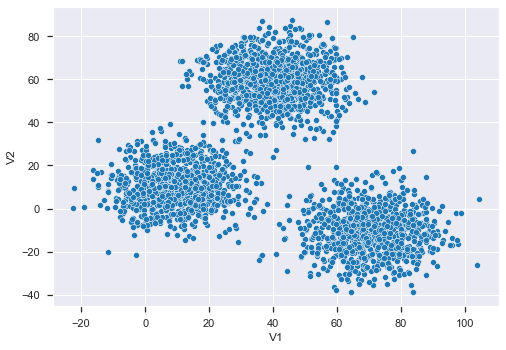

In [19]:
sns.scatterplot(x = 'V1', y = 'V2', data = X_simple)
plt.show()

Optimal cluster number at/near elbow/kink

Inertia decreases sharply until it hits optimal cluster number:
- Then increasing number makes marginal gains.

The behavior of inertia as a function of K is almost never this clean:
- well separated clusters
- similar sizes, etc

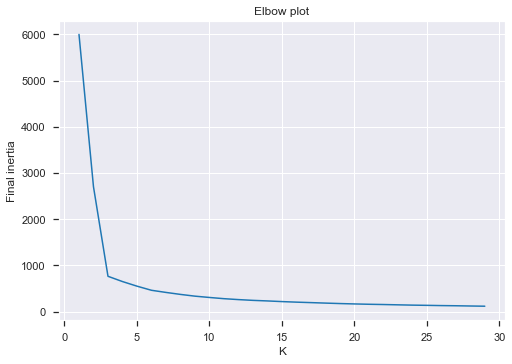

In [20]:
plot_inertias(X_simple, 30, 1, kmc_pipe)

Example with our old dataset: a little less good.

A good choice might be k = 15 (the real cluster number)

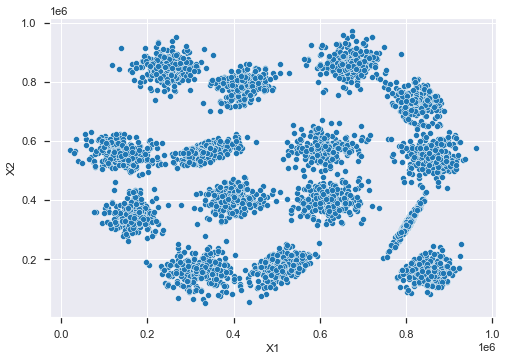

In [21]:
sns.scatterplot(x = 'X1', y = 'X2', data = X)
plt.show()

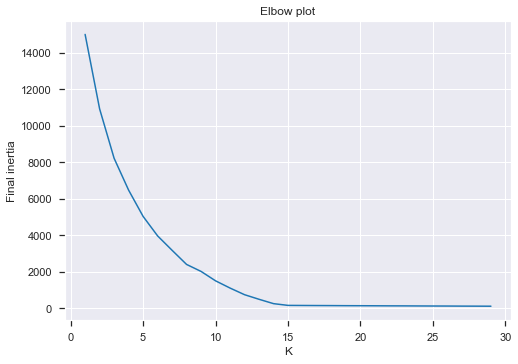

In [22]:
plot_inertias(X, 30, 1, kmc_pipe)

In [23]:
import pandas as pd
X_s4 = pd.read_csv('Data/s4cluster.txt', delimiter = '\s+ ', header = None, names = ['X1', 'X2'], engine = 'python')
X_s4.head()

,X1,X2
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844


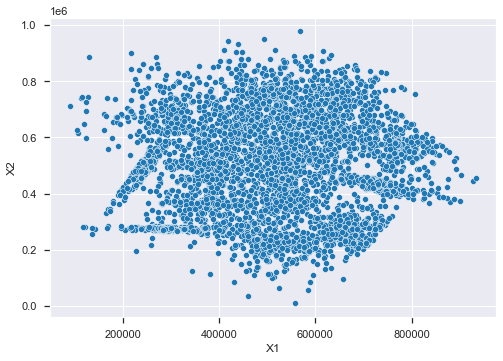

In [24]:
sns.scatterplot(x = 'X1', y = 'X2', data = X_s4)
plt.show()

Looks like a mess. But this kind of mess is typical.
- A hexbin density plot reveals the clustering structure.

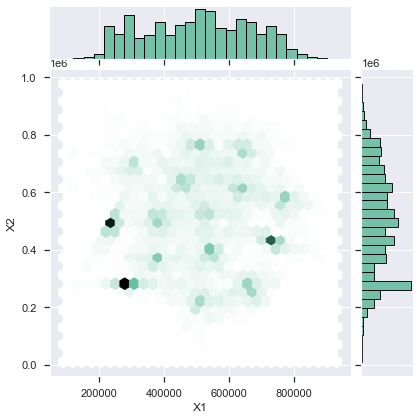

In [25]:
sns.jointplot(x= 'X1', y= 'X2', kind="hex", data = X_s4, color="#4CB391")
plt.show()

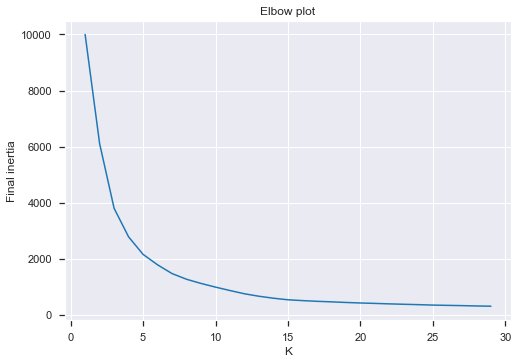

In [26]:
plot_inertias(X_s4, 30, 1, kmc_pipe)

Doesn't work very well.

- When there is a lot of overlap, sum of squared errors decreases smoothly with number of centroids.
- Need a better/more meaningful metric to measure effectiveness of clustering.

#### The silhouette coefficient
A more principled way of measuring clustering effectiveness

<img src = "Images/silhouette_distance.png"/>

The notion of **cohesion**: 
- how tightly bound is a point in a given cluster to its cluster members?

**Cohesiveness**

$$ a(i) = \overline{d(x_i, x_j)} $$ 

for $j$ indexing points in same clusters as point $i$.

**Average of distance of $i$ to its clustermates.**

The notion of **differentiation**: 
- how far away is a point in a given cluster from points in other clusters?

**Differentiation**

$$ b(i) = \overline{d(x_i, x_k)} $$ 

for $k$ indexing points in nearest neighboring cluster.

#### Silhouette index

Measuring binding of a point to its own cluster vs. neighboring cluster.

Silhouette index for point $i$:
$$ s(i) = \frac{b(i) - a(i)}{\max(a(i),b(i))} $$

- When $a(i)$ is very small compared to $b(i)$:
    - Point $i$ much more tightly bound to clustermates than neighboring cluster.
    - $s(i) \rightarrow 1$

- When $a(i)$ is very large compared to $b(i)$:
    - Point $i$ closer to points in neighboring cluster than its own.
    - $s(i) \rightarrow -1$

Visualizing silhouette index for entire dataset:
- cohesiveness/differentiation for each assigned cluster.

Let's evaluate clustering on our trickiest clustering dataset:

In [27]:
steps = [('scaler', StandardScaler()), 
         ('kmc', KMeans(n_clusters = 15,n_init = 10) ) ]
kmc_pipe = Pipeline(steps)
X_s4['clstr_labels'] = kmc_pipe.fit_predict(X_s4[['X1', 'X2']])
X_s4.head()

,X1,X2,clstr_labels
0,624474,837604,9
1,673412,735362,9
2,647442,677000,1
3,532283,741384,4
4,646529,742844,9


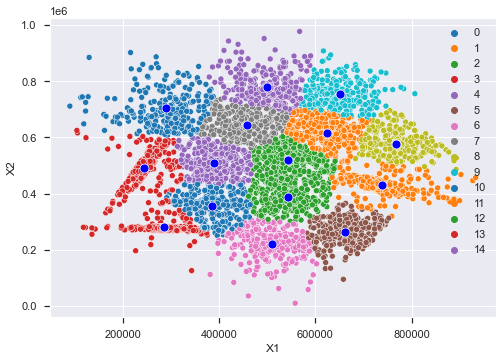

In [28]:
sns.set_palette("tab10")
scld_centers = kmc_pipe['kmc'].cluster_centers_
kc_centers = kmc_pipe['scaler'].inverse_transform(scld_centers)
sns.scatterplot(x = 'X1', y = 'X2', hue = 'clstr_labels', palette=sns.color_palette('tab10', n_colors= 15), data = X_s4)
sns.scatterplot(x = kc_centers[:,0], y = kc_centers[:,1], color = 'blue', s = 80)

plt.show()

The fitted centroids and the centers of density line up well.

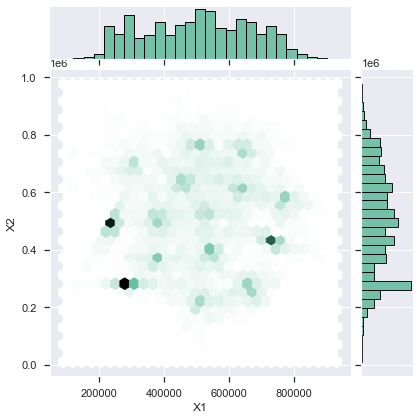

In [29]:
sns.jointplot(x= 'X1', y= 'X2', kind="hex", data = X_s4, color="#4CB391")
plt.show()

Scikit-learn can calculate silhouette index for each data point given cluster labels:

- silhouette_samples(data, cluster_labels)

In [30]:
from sklearn.metrics import silhouette_samples

Let'd do this on our clustering result:

In [31]:
silhouette_samples(X_s4[['X1', 'X2']],
                   X_s4['clstr_labels'])

array([0.32078401, 0.56667407, 0.1057546 , ..., 0.00454694, 0.47070872,
       0.47214342])

In [32]:
X_s4['silhouette'] = silhouette_samples(X_s4[['X1', 'X2']],
                   X_s4['clstr_labels'])

X_s4.head()

,X1,X2,clstr_labels,silhouette
0,624474,837604,9,0.320784
1,673412,735362,9,0.566674
2,647442,677000,1,0.105755
3,532283,741384,4,0.455348
4,646529,742844,9,0.618824


One useful plot is a barplot of the average silhouette index for each cluster.

In [33]:
col_list = ['clstr_labels', 'silhouette']
silh_idx_avgs = X_s4[col_list].groupby('clstr_labels').mean() #.sort_values(by = 'silhouette')

In [34]:
silh_idx_avgs.head()

,silhouette
clstr_labels,
0,0.371727
1,0.389346
2,0.485750
3,0.629741
4,0.400266


A visual of the cohesion/differentiation by cluster

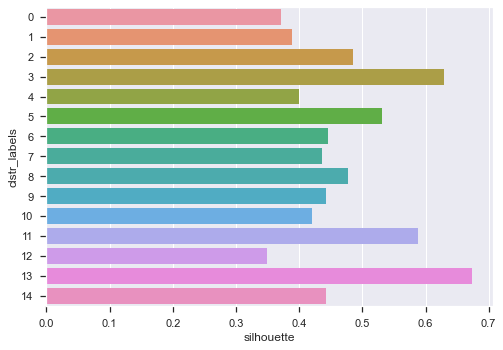

In [35]:
sns.barplot(x = 'silhouette', 
            y = 'clstr_labels', orient = 'h',
            data = silh_idx_avgs.reset_index())
plt.show()

**The silhouette score**: average silhouette index over all samples
- the better the clustering solution, the higher the value.

In [36]:
from sklearn.metrics import silhouette_score


In [37]:
s_score = silhouette_score(X_s4[['X1', 'X2']], X_s4['clstr_labels'])
s_score

0.4795382130945243

An often used visual is the silhouette plot.
- More information than average silhouette score by cluster.
- Distribution of silhouette indices by cluster.

In [38]:
def silhouette_plot(Xclustered_scores):
    
    n_clusters = 15
    
    fig, ax = plt.subplots(figsize = (8,11))
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.axvline(x=s_score, color="red", linestyle="--")


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = Xclustered_scores[Xclustered_scores['clstr_labels'] == i].silhouette

        ith_cluster_silhouette_values = ith_cluster_silhouette_values.sort_values(ascending = True)

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")


    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()
    

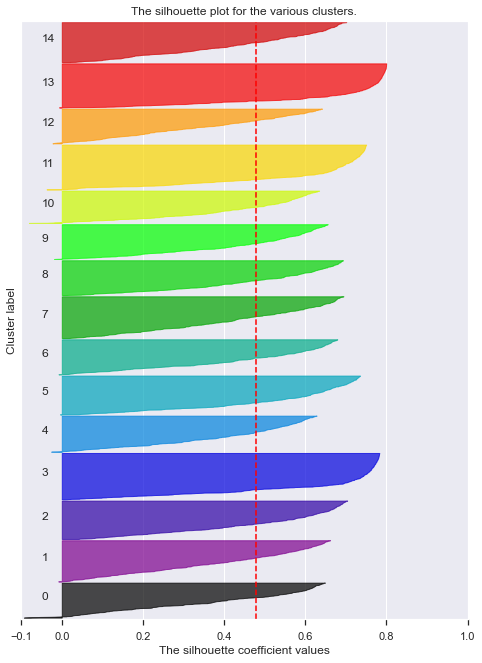

In [39]:
silhouette_plot(X_s4)

- Distribution of silhouette indices grouped by cluster.
- Want all labels to be above the average

Comparing plot by plot for each realization of $k$:
- comprehensive but also may want a quick/dirty metric for tuning K


#### Plotting silhouette coefficient vs. K
- Plot/metric for finding a plausible K

In [40]:
def plot_silh_scores(X, K, increment, kmc_pipe):

    klist = np.arange(2,K,increment)
    score_list = []
    for k in klist:
        kmc_pipe.steps.pop(-1)
        kmc_pipe.steps.append(('kmc', 
                               KMeans(
                                   n_clusters = k, n_init = 10)))
        clstr_labels = kmc_pipe.fit_predict(X)

        score = silhouette_score(X, clstr_labels)
        score_list.append(score)
        
    sns.lineplot(x = klist, y = score_list, color = 'r')
    plt.ylabel('Silhouette Coefficient')
    plt.xlabel('K')
    plt.title('Silhouette coefficient plot')
    plt.show()

The maximum silhouette score is clearly at k = 15:
- matches our exact cluster number even with our trickier dataset.
- elbow plot tells us nothing.

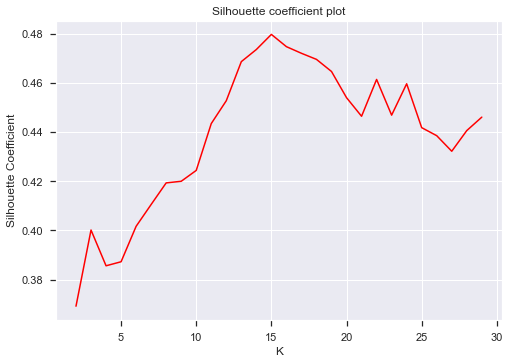

In [41]:
plot_silh_scores(X_s4[['X1', 'X2']], 
                 30, 1, kmc_pipe)

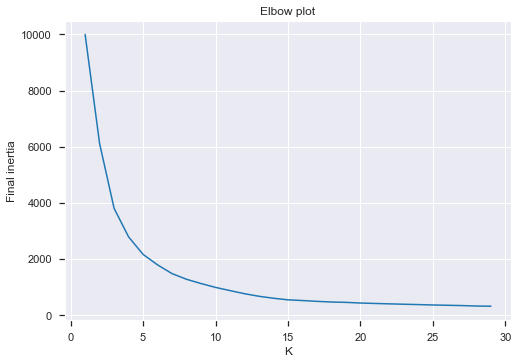

In [42]:
plot_inertias(X_s4[['X1', 'X2']], 
              30, 1, kmc_pipe)

#### **Limitations** of $k$-means

#### Ideal $k$-means scenario

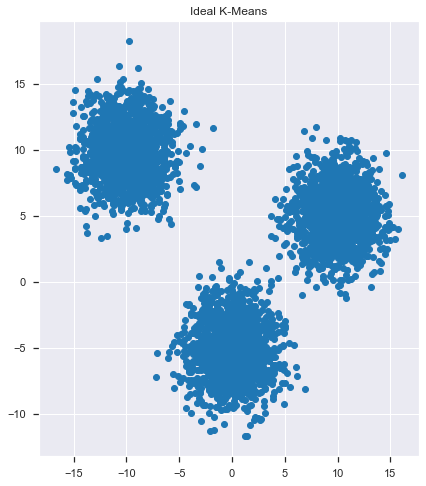

In [43]:
ideal()

#### KMeans works well when:

- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

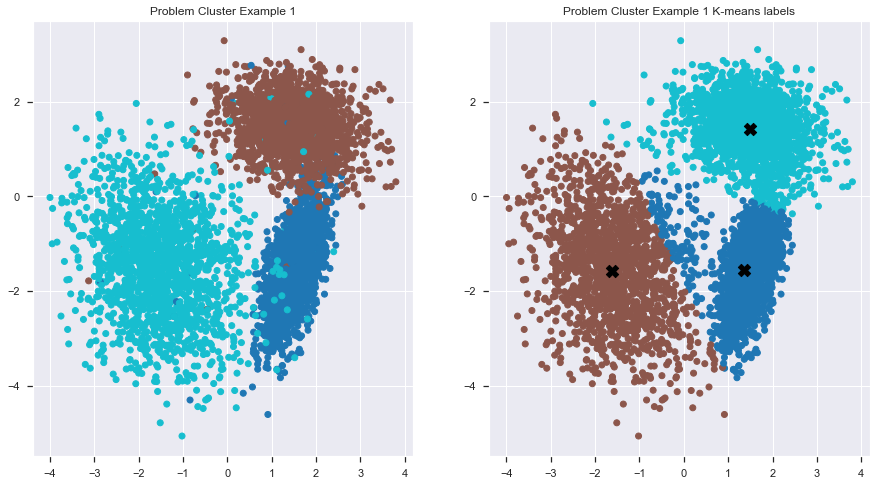

In [44]:
messyOne()

#### Problem Scenario 2 - imbalanced class size

c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


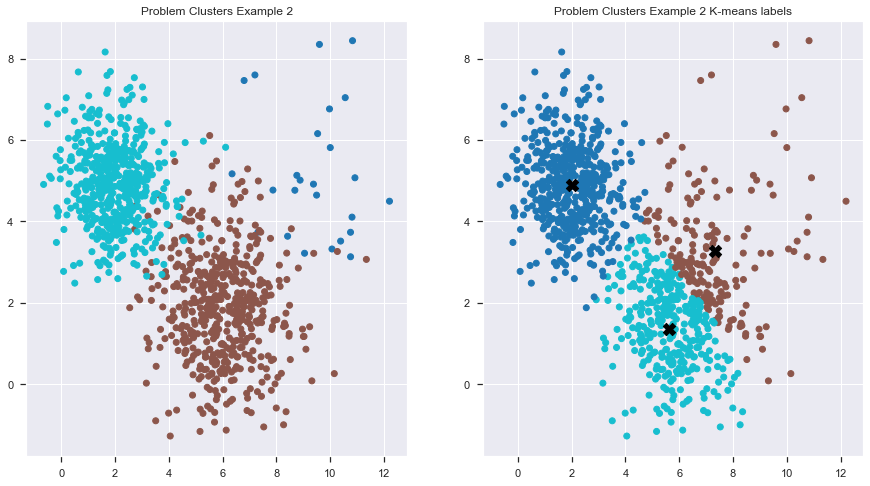

In [45]:
messyTwo()

#### Problem Scenario 3 - class size and density

c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


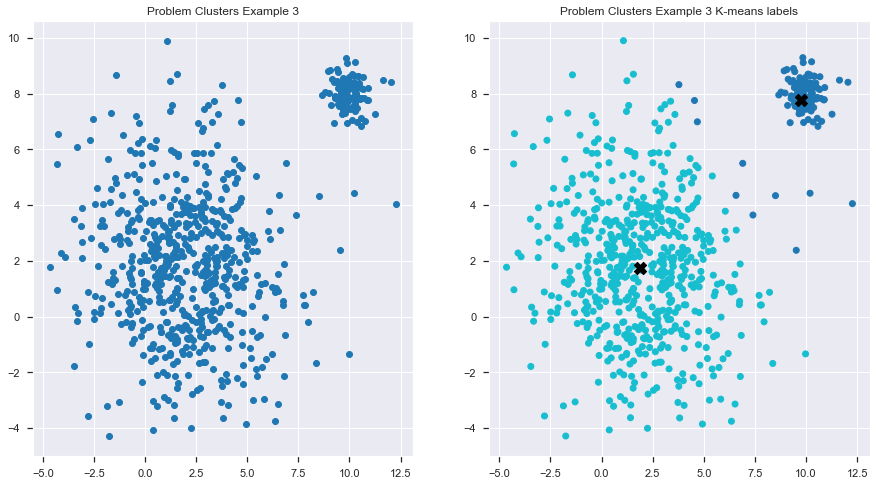

In [46]:
messyThree()

#### Solution to challenges:

- Try different clustering methods:
- e.g., Gaussian mixtures, DBSCAN, Hierarchical clustering, etc.

### $k$ - means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [47]:
wine = pd.read_csv('data/Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Review $k$-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of $k$
4. Create an elbow plot and Silhouette coefficient plot to find best $k$


### How many clusters fit the data?

What can you tell me about them?

<details>
    <summary>One answer here</summary>
    
```python
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(wine)
wine_scaled = ss.transform(wine)
silhouette_scores = []
for j in range(2, 30):
    clusters = KMeans(n_clusters=j, n_init =10, random_state=42)
    cluster_labels = clusters.fit_predict(wine)
    silhouette = metrics.silhouette_score(wine, cluster_labels)
    silhouette_scores.append(silhouette)
print(f'The best number of clusters is {np.argmax(silhouette_scores) + 2}') 
plot_inertias(wine_scaled, 30, 1, kmc_pipe)
plot_silh_scores(wine_scaled, 30, 1, kmc_pipe)
best = KMeans(n_clusters=2, n_init =10, random_state=42)
wine['cluster'] = best.fit_predict(wine)
print(wine.groupby('cluster').mean())
```
</details>

c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: 

The best number of clusters is 2


c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: 

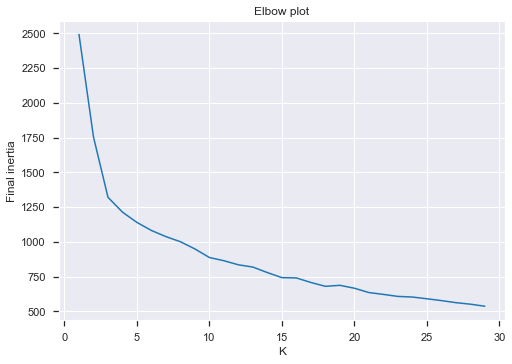

c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: 

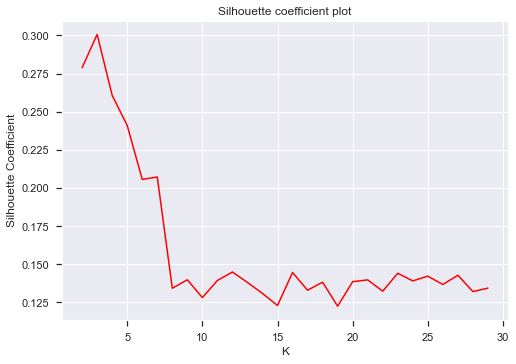

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
cluster                                                              
0        12.702846    2.544553  2.339106     20.408130   96.813008   
1        13.666545    1.870727  2.427818     17.452727  106.290909   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
cluster                                                                     
0             2.062114    1.641463              0.392683         1.454065   
1             2.816182    2.896545              0.292909         1.896909   

         Color_Intensity       Hue     OD280      Proline  
cluster                                                    
0               4.851382  0.908618  2.408211   565.869919  
1               5.520364  1.066655  3.066727  1151.727273  


c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(wine)
wine_scaled = ss.transform(wine)
silhouette_scores = []
for j in range(2, 30):
    clusters = KMeans(n_clusters=j, n_init =10, random_state=42)
    cluster_labels = clusters.fit_predict(wine_scaled)
    silhouette = metrics.silhouette_score(wine_scaled, cluster_labels)
    silhouette_scores.append(silhouette)

print(f'The best number of clusters is {np.argmax(silhouette_scores) + 2}') 
plot_inertias(wine_scaled, 30, 1, kmc_pipe)
plot_silh_scores(wine_scaled, 30, 1, kmc_pipe)
best = KMeans(n_clusters=2, n_init =10, random_state=42)
wine['cluster'] = best.fit_predict(wine)
print(wine.groupby('cluster').mean())